In [ ]:
#Importing packages
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report

In [ ]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib

In [ ]:
#Setting the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:\\Users\\A\\Desktop\\Bioactive\\pg")

In [5]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [6]:
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

In [7]:
#Reading the data
ML_data= pd.read_csv("./Original data/ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./Original data/X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original data/raw_data.csv',index_col=0)
Raw_data

,acvalue,aid,sid,cid.1,geneid,pmid,aidtype,aidmdate,hasdrc,rnai,...,targeturl,ecs,repacxn,taxid,cellids,targettaxid,tissueid,tissuename,Antimicrobial,SMILES
cid,,,,,,,,,,,,,,,,,,,,,
5904,0.29,1437928,103165163,5904,NaN,28079378.0,Confirmatory,20220830,0,0,...,/taxonomy/837,NaN,NaN,NaN,NaN,837,NaN,NaN,1,CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C
155543311,2.30,1571234,440163866,155543311,NaN,30881614.0,Confirmatory,20220830,0,0,...,/taxonomy/837,NaN,NaN,NaN,NaN,837,NaN,NaN,1,C1=CC(=CC=C1C2=NC(=C(O2)C3=CC=C(C=C3)F)C4=CC=C...
155511868,2.40,1571234,440111790,155511868,NaN,30881614.0,Confirmatory,20220830,0,0,...,/taxonomy/837,NaN,NaN,NaN,NaN,837,NaN,NaN,1,C1=CC=C(C(=C1)C2=NC(=C(O2)C3=CC=CO3)C4=CC=CO4)...
155547676,3.70,1571234,440174844,155547676,NaN,30881614.0,Confirmatory,20220830,0,0,...,/taxonomy/837,NaN,NaN,NaN,NaN,837,NaN,NaN,1,CCN(CC)C1=NC(=NC(=N1)C2=CN(N=N2)C3=CC=C(C=C3)C...
155510814,4.30,1571234,440110233,155510814,NaN,30881614.0,Confirmatory,20220830,0,0,...,/taxonomy/837,NaN,NaN,NaN,NaN,837,NaN,NaN,1,C1=CC=C(C=C1)C2=C(OC(=N2)C3=CC(=CC=C3)N4C=C(N=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162658036,NaN,1725206,461535923,162658036,NaN,33062172.0,Literature-derived,20220318,0,0,...,/taxonomy/837,NaN,NaN,NaN,NaN,837,NaN,NaN,1,CN1C=C(C2=C1C=CC(=C2)[N+](=O)[O-])CC3=CC(=C(C=...
162647428,NaN,1725205,461520763,162647428,NaN,33062172.0,Literature-derived,20220318,0,0,...,/taxonomy/837,NaN,NaN,NaN,NaN,837,NaN,NaN,0,CN1C=C(C2=CC=CC=C21)CC3=CC(=C(C=C3)OC)C(=O)NS(...
162663043,NaN,1725205,461543092,162663043,NaN,33062172.0,Literature-derived,20220318,0,0,...,/taxonomy/837,NaN,NaN,NaN,NaN,837,NaN,NaN,0,CN1C=C(C2=CC=CC=C21)CC3=CC(=C(C=C3)OC)C(=O)NS(...


In [8]:
#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(152, 4143)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
CID,,,,,,,,,,,,,,,,,,,,,
5904,334.43,8.156829,26.3035,41.6580,27.5683,46.0758,0.641549,1.016049,0.672398,1.123800,...,0.0,0.0,0.0,6.0,18.166667,0.789855,4.5,0.195652,18.311935,5.513107
155543311,697.70,9.302667,54.1818,77.2467,54.1084,84.7897,0.722424,1.029956,0.721445,1.130529,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
155511868,641.64,9.299130,49.7912,71.1087,49.6196,77.6987,0.721612,1.030561,0.719125,1.126068,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
155547676,654.66,8.286835,52.4108,79.3777,55.1198,88.9797,0.663428,1.004781,0.697719,1.126325,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
155510814,661.72,8.822933,53.4152,76.2213,54.2334,84.1103,0.712203,1.016284,0.723112,1.121471,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [9]:
#Data after feature selection (descriptors= 64）
print(ML_data.shape)
ML_data.head()

(152, 87)


,GATS4s,ChiA_B(s),GATS2v,phLevel2,SM1_Dz(Z),GATS2m,MATS3e,CATS2D_04_AA,P_VSA_charge_12,nCs,...,JGI5,CATS2D_05_DA,GATS6v,JGI10,nCp,Eta_D_epsiD,GATS3s,CATS2D_05_DL,SpMAD_X,C-005
cid,,,,,,,,,,,,,,,,,,,,,
5904,0.356299,0.375195,0.315005,0.555556,0.455344,0.452534,0.521857,0.000000,0.066667,0.090909,...,0.524988,0.066667,0.130742,0.693540,0.105263,0.321070,0.462961,0.148148,0.354747,0.0
155543311,0.282367,0.181396,0.358639,0.000000,0.608666,0.212457,0.193434,0.222222,0.124957,0.000000,...,0.515758,0.133333,0.386704,0.431786,0.000000,0.146074,0.537942,0.000000,0.628187,0.0
155511868,0.286275,0.189276,0.332109,0.000000,0.584945,0.252052,0.322118,0.444444,0.202169,0.000000,...,0.359276,0.133333,0.320135,0.452384,0.000000,0.157665,0.579321,0.000000,0.644736,0.0
155547676,0.528336,0.369634,0.071157,0.000000,0.603178,0.123372,0.440557,0.388889,0.124957,0.000000,...,0.693899,0.000000,0.351193,0.333337,0.210526,0.000000,0.319512,0.000000,0.755306,0.0
155510814,0.291741,0.237414,0.374375,0.000000,0.506789,0.278131,0.330990,0.222222,0.124957,0.000000,...,0.433183,0.133333,0.351345,0.402961,0.000000,0.141631,0.506121,0.000000,0.701915,0.0


In [10]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Antimicrobial'].values
clf=DecisionTreeClassifier(random_state=0)

# DT

In [10]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Antimicrobial'].values
clf=DecisionTreeClassifier(random_state=0)

In [11]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.801269,0.007676
Accuracy_train,0.994904,0.000564
F1 Score,0.464871,0.024807
Precision,0.504607,0.026098
Recall,0.476667,0.032663
Roc_auc,0.677197,0.015111


In [12]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.827011,0.009767
Accuracy_train,0.994904,0.000564
F1 Score,0.527903,0.027418
Precision,0.593598,0.033815
Recall,0.506667,0.029424
Roc_auc,0.704681,0.015671


In [13]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-08-14 11:08:29,604] A new study created in memory with name: no-name-af5708f5-e304-413c-a8ee-e07a62743854
[I 2023-08-14 11:08:30,971] Trial 0 finished with value: 0.7959569892473118 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.7959569892473118.
[I 2023-08-14 11:08:30,995] Trial 1 finished with value: 0.8083655913978494 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 1 with value: 0.8083655913978494.
[I 2023-08-14 11:08:31,017] Trial 2 finished with value: 0.7617634408602152 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 1 with value: 0.8083655913978494.
[I 2023-08-14 11:08:31,040] Trial 3 finished with value: 0.7910967741935484 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 1 with value: 0.8083655913978494.
[I 2023-08-14 11:08:31,067] Trial 4 finished with value: 0.801806451612903

In [14]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 3, 'max_features': 10, 'min_samples_split': 4}


In [15]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.832258,0.008489
Accuracy_train,0.927972,0.002641
F1 Score,0.535000,0.024916
Precision,0.626367,0.031914
Recall,0.513333,0.030126
Roc_auc,0.732847,0.015607


In [16]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [18]:
data_dt=ML_data[columns]
data_dt.to_csv("./Results/data_dt.csv",sep=',')
X_DT=np.array(data_dt)

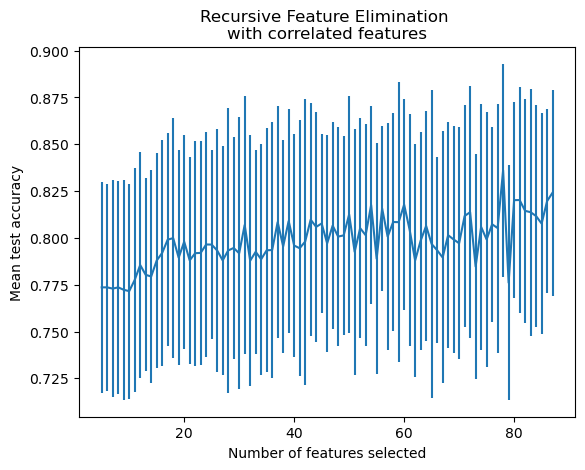

In [19]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [20]:
#Model4 （len(columns) descriptors）
Model4_clf=DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)
Model4_clf.fit(X_DT, y)
#Model4
Model4=Model_results(Model4_clf,X_DT,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.836237,0.009260
Accuracy_train,0.909541,0.002419
F1 Score,0.527132,0.023733
Precision,0.690016,0.033236
Recall,0.480000,0.027341
Roc_auc,0.742589,0.015217


In [21]:
Model4_clf=Model4_clf.fit(X_DT, y)
#Saving the final model
joblib.dump(Model4_clf, './Models/DT.pkl')
DT= joblib.load(filename='./Models/DT.pkl')

In [22]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./Original data/X_test_data.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_dt.columns.to_list()]
X_test=np.array(X_test_last)
X_test_last.head()

,CATS2D_04_AA,P_VSA_charge_12,nCs,MATS1s,minaasC,MATS3i,MATS5s,Eta_epsi_5,SIC3,IC1,...,JGI5,CATS2D_05_DA,GATS6v,JGI10,nCp,Eta_D_epsiD,GATS3s,CATS2D_05_DL,SpMAD_X,C-005
cid,,,,,,,,,,,,,,,,,,,,,
5273,0.111111,0.122129,0.060606,0.526320,0.768960,0.183738,-0.030748,0.323208,0.897703,0.718102,...,0.350635,0.000000,0.472454,0.0,0.000000,0.674359,0.284272,0.037037,0.670513,0.0
13463,0.222222,0.000000,0.090909,0.172647,0.677781,0.266664,0.467300,0.620248,0.956231,0.854763,...,0.562308,0.133333,0.464608,0.0,0.052632,0.797546,0.476107,0.037037,0.716550,0.0
39148,0.277778,0.000000,0.090909,0.295151,0.690167,0.317640,0.361597,0.505688,0.791869,0.783197,...,0.519549,0.266667,0.063983,0.0,0.052632,0.690989,0.365933,0.000000,0.601947,1.0
56328,0.166667,0.000000,0.090909,0.491926,0.677850,0.535283,0.598849,0.704013,0.951972,0.892016,...,0.497261,0.066667,0.463480,0.0,0.052632,0.650968,0.562805,0.000000,0.698243,0.0
67358,0.388889,0.057294,0.090909,0.286401,0.579518,0.276245,0.356008,0.650502,0.963844,0.892178,...,0.596522,0.266667,0.420126,0.0,0.052632,0.957692,0.424615,0.000000,0.645676,0.0


In [24]:
Predicted_data=pd.DataFrame(DT.predict_proba(X_test),columns=['Probability of not Antimicrobial','Probability of Antimicrobial'])

Predicted_data

,Probability of not Antimicrobial,Probability of Antimicrobial
0,0.931034,0.068966
1,0.000000,1.000000
2,0.931034,0.068966
3,0.000000,1.000000
4,0.000000,1.000000
...,...,...
6864,0.000000,1.000000
6865,0.000000,1.000000
6866,0.000000,1.000000
6867,0.000000,1.000000


In [26]:
#Predicted results
Predicted_data=pd.DataFrame(DT.predict_proba(X_test),columns=['Probability of not Antimicrobial','Probability of Antimicrobial'])
Predicted_data.index=X_test_last.index
Predicted_data.sort_values(by="Probability of Antimicrobial" , inplace=True, ascending=False)
Predicted_data.to_csv("./Results/DT_predict_data.csv",sep=',')
Predicted_data.head()

,Probability of not Antimicrobial,Probability of Antimicrobial
cid,,
125507522,0.0,1.0
3005964,0.0,1.0
515099,0.0,1.0
514805,0.0,1.0
476786,0.0,1.0


In [27]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./Results/DT_model_data.csv",sep=',')
Model_data.columns = [['DecisionTree']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./Results/DT_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/DT_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         DecisionTree                                                    \
Model               Model 1             Model 2             Model 3             
Values                 Mean        Se      Mean        Se      Mean        Se   
Accuracy_test      0.801269  0.007676  0.827011  0.009767  0.832258  0.008489   
Accuracy_train     0.994904  0.000564  0.994904  0.000564  0.927972  0.002641   
F1 Score           0.464871  0.024807  0.527903  0.027418  0.535000  0.024916   
Precision          0.504607  0.026098  0.593598  0.033815  0.626367  0.031914   
Recall             0.476667  0.032663  0.506667  0.029424  0.513333  0.030126   
Roc_auc            0.677197  0.015111  0.704681  0.015671  0.732847  0.015607   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.836237  0.009260  
Accuracy_train  0.909541  0.002419  
F1 Score        0.527132  0.023733  
Precision       0.690016  0.033236  
Recall          0.480000  0.027341  
Roc_auc         0.742589  0.015217

# LR

In [12]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.805871,0.009184
Accuracy_train,0.857240,0.003476
F1 Score,0.425974,0.024933
Precision,0.543667,0.035104
Recall,0.376667,0.024860
Roc_auc,0.762497,0.016619


In [13]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.834925,0.007852
Accuracy_train,0.917599,0.002073
F1 Score,0.463574,0.024180
Precision,0.710143,0.040642
Recall,0.373333,0.022881
Roc_auc,0.861425,0.011278


In [14]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-08-14 13:38:54,010] A new study created in memory with name: no-name-4d20e7ea-7297-4d77-9e93-290b10a1d517
[I 2023-08-14 13:38:55,313] Trial 0 finished with value: 0.833462365591398 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.833462365591398.
[I 2023-08-14 13:38:55,343] Trial 1 finished with value: 0.8039139784946235 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 0 with value: 0.833462365591398.
[I 2023-08-14 13:38:55,370] Trial 2 finished with value: 0.8025806451612902 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 0 with value: 0.833462365591398.
[I 2023-08-14 13:38:55,398] Trial 3 finished with value: 0.8435268817204302 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.8435268817204

In [15]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 5.412310787516514, 'l1_ratio': 0.9033638755458229, 'max_iter': 250}


In [16]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.869355,0.007519
Accuracy_train,0.947373,0.001858
F1 Score,0.614380,0.022321
Precision,0.778032,0.030932
Recall,0.540000,0.023833
Roc_auc,0.871703,0.010692


In [17]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [18]:
data_lr=ML_data[columns]
data_lr.to_csv("./Results/data_lr.csv",sep=',')
X_LR=np.array(data_lr)

In [19]:
data_lr

,GATS4s,phLevel2,minaasC,MATS5s,Eta_epsi_5,SpMin2_Bh(s),P_VSA_charge_5,MATS4p,VE1_B(e),nArX,...,SpMin1_Bh(m),F10[N-O],MaxaasC,GATS8v,P_VSA_charge_6,SpMin2_Bh(m),CATS2D_04_LL,CATS2D_04_DD,GATS3i,P_VSA_charge_13
cid,,,,,,,,,,,,,,,,,,,,,
5904,0.356299,0.555556,0.930036,0.584685,0.551765,0.661466,0.317453,0.431687,0.432191,0.00,...,0.546908,0.000000,0.671184,0.681658,0.290500,0.683519,0.020408,0.00,0.734191,0.447547
155543311,0.282367,0.000000,0.423750,0.464588,0.627081,0.562799,0.164178,0.784848,0.484858,1.00,...,0.476727,0.285714,0.516713,0.708105,0.101412,0.894693,0.122449,0.25,0.409611,0.000000
155511868,0.286275,0.000000,0.427995,0.484617,0.617120,0.478947,0.164178,0.743464,0.690344,0.50,...,0.443797,0.428571,0.495983,0.686754,0.217612,0.854409,0.000000,0.25,0.484384,0.000000
155547676,0.528336,0.000000,0.772357,0.096187,0.509347,0.590811,0.164178,0.549023,0.458635,0.50,...,0.453924,0.285714,0.684811,0.703493,0.697662,0.893200,0.204082,0.00,0.418970,0.000000
155510814,0.291741,0.000000,0.431982,0.495737,0.443715,0.564789,0.164178,0.804899,0.950127,0.50,...,0.546001,0.000000,0.719736,0.702671,0.740512,0.898730,0.122449,0.25,0.465872,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162658036,0.324919,0.000000,0.452950,0.282759,0.880889,0.639938,1.000000,0.560738,0.806193,0.00,...,0.589181,0.714286,0.603881,0.625428,0.058100,0.871097,0.142857,0.00,0.794224,1.000000
162647428,0.304750,0.000000,0.295864,0.837387,0.618730,0.612648,0.000000,0.539532,0.624250,0.25,...,0.594330,0.285714,0.812264,0.594113,0.290500,0.865465,0.163265,0.00,0.568469,1.000000
162663043,0.301097,0.000000,0.352592,0.361999,0.618730,0.613751,0.000000,0.553376,0.637416,0.25,...,0.594345,0.285714,0.816455,0.598916,0.232400,0.865512,0.163265,0.00,0.568469,1.000000


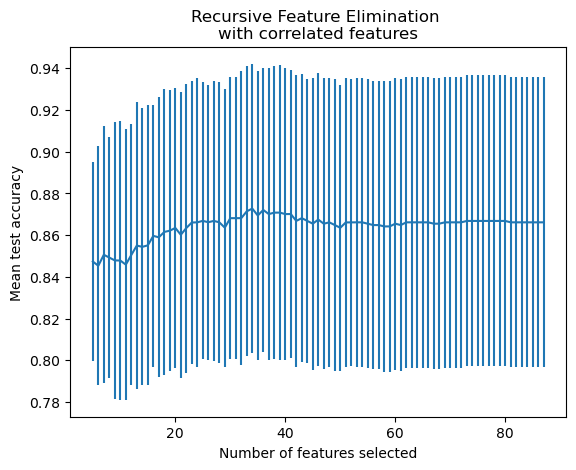

In [20]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [21]:
#Model4 （len(columns) descriptors）
Model4_clf=LogisticRegression(C=study.best_params['logreg_c'],max_iter=study.best_params['max_iter'],solver='liblinear',random_state=0)
#Model4
Model4=Model_results(Model4_clf,X_LR,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.897441,0.006802
Accuracy_train,0.944414,0.001668
F1 Score,0.697472,0.020409
Precision,0.840952,0.023987
Recall,0.620000,0.024513
Roc_auc,0.923119,0.008069


In [22]:
Model4_clf=Model4_clf.fit(X_LR, y)
#Saving the final model
joblib.dump(Model4_clf, './Models/LogReg.pkl')


['./Models/LogReg.pkl']

In [23]:
LogReg= joblib.load(filename='./Models/LogReg.pkl')

In [24]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./Original data/X_test_data.csv",sep=',',index_col=0)
data_lr=pd.read_csv("./Results/data_lr.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_lr.columns.to_list()]
X_test=np.array(X_test_last)
X_test_last.head()

,GATS4s,phLevel2,minaasC,MATS5s,Eta_epsi_5,SpMin2_Bh(s),P_VSA_charge_5,MATS4p,VE1_B(e),nArX,...,SpMin1_Bh(m),F10[N-O],MaxaasC,GATS8v,P_VSA_charge_6,SpMin2_Bh(m),CATS2D_04_LL,CATS2D_04_DD,GATS3i,P_VSA_charge_13
cid,,,,,,,,,,,,,,,,,,,,,
5273,0.342920,0.000000,0.768960,-0.030748,0.323208,0.316280,0.018711,0.968030,0.107768,0.0,...,0.108964,0.0,0.393133,0.582105,0.0,0.522215,0.0,0.00,0.624981,0.000000
13463,0.417160,0.583333,0.677781,0.467300,0.620248,0.394559,0.385724,0.821027,0.128494,0.0,...,-0.001840,0.0,0.235737,0.766627,0.0,0.400957,0.0,0.00,0.607250,0.000000
39148,0.245117,0.666667,0.690167,0.361597,0.505688,0.391642,0.000000,0.582844,0.133538,0.0,...,0.144215,0.0,0.257118,0.692269,0.0,0.539577,0.0,0.00,0.837932,0.000000
56328,0.334702,0.333333,0.677850,0.598849,0.704013,0.386385,0.000000,0.641016,0.123746,0.0,...,0.032446,0.0,0.235855,0.794233,0.0,0.499335,0.0,0.00,0.465961,0.000000
67358,0.283538,0.666667,0.579518,0.356008,0.650502,0.384732,0.039870,0.699893,0.134026,0.0,...,0.013973,0.0,0.066114,0.804278,0.0,0.446843,0.0,0.25,0.651795,0.819875


In [25]:
Predicted_data=pd.DataFrame(LogReg.predict_proba(X_test),columns=['Probability of not Antimicrobial','Probability of Antimicrobial'])

Predicted_data

,Probability of not Antimicrobial,Probability of Antimicrobial
0,0.877867,0.122133
1,0.466302,0.533698
2,0.608414,0.391586
3,0.406289,0.593711
4,0.308656,0.691344
...,...,...
6864,0.386022,0.613978
6865,0.633290,0.366710
6866,0.425505,0.574495
6867,0.258708,0.741292


In [27]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./Results/LR_model_data.csv",sep=',')
Model_data.columns = [['LogisticRegression']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./Results/LR_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         LogisticRegression                                          \
Model                     Model 1             Model 2             Model 3   
Values                       Mean        Se      Mean        Se      Mean   
Accuracy_test            0.805871  0.009184  0.834925  0.007852  0.869355   
Accuracy_train           0.857240  0.003476  0.917599  0.002073  0.947373   
F1 Score                 0.425974  0.024933  0.463574  0.024180  0.614380   
Precision                0.543667  0.035104  0.710143  0.040642  0.778032   
Recall                   0.376667  0.024860  0.373333  0.022881  0.540000   
Roc_auc                  0.762497  0.016619  0.861425  0.011278  0.871703   

Method                                        
Model                      Model 4            
Values                Se      Mean        Se  
Accuracy_test   0.007519  0.897441  0.006802  
Accuracy_train  0.001858  0.944414  0.001668  
F1 Score        0.022321  0.697472  0.020409  
Precision       0.030932  0.840952  0.023987  
Recall          0.023833  0.620000  0.024513  
Roc_auc         0.010692  0.923119  0.008069

# RF

In [10]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.827032,0.008050
Accuracy_train,0.994904,0.000564
F1 Score,0.456710,0.025609
Precision,0.633333,0.035516
Recall,0.390000,0.026504
Roc_auc,0.881539,0.010059


In [11]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.850645,0.008343
Accuracy_train,0.994904,0.000564
F1 Score,0.535800,0.026989
Precision,0.722405,0.034463
Recall,0.460000,0.028503
Roc_auc,0.900353,0.009632


In [12]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"])
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2023-08-14 11:12:12,867] A new study created in memory with name: no-name-8c78301f-bbe1-49dd-baad-f5e3a62826bb
[I 2023-08-14 11:12:17,589] Trial 0 finished with value: 0.8025806451612902 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.8025806451612902.
[I 2023-08-14 11:12:20,222] Trial 1 finished with value: 0.8025806451612902 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.8025806451612902.
[I 2023-08-14 11:12:25,248] Trial 2 finished with value: 0.8025806451612902 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.8025806451612902.
[I 2023-08-14 11:12:28,337] Trial 3 finished with value: 0.8025806451612902 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [13]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 816, 'max_depth': 6, 'max_features': 28, 'min_impurity_decrease': 0.030289951356201047}


In [14]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.855957,0.006327
Accuracy_train,0.936522,0.001734
F1 Score,0.506278,0.026856
Precision,0.787429,0.034138
Recall,0.410000,0.027972
Roc_auc,0.887875,0.009955


In [15]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [16]:
data_rf=ML_data[columns]
data_rf.to_csv("./Results/data_rf.csv",sep=',')
X_RF=np.array(data_rf)

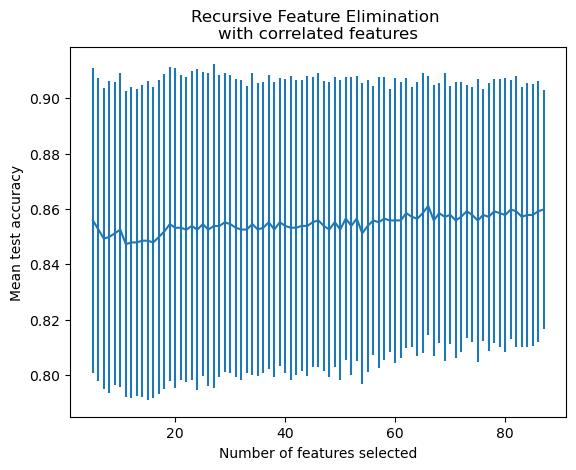

In [17]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [18]:
#Model4 （len(columns) descriptors）
Model4_clf=clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)
Model4_clf.fit(X_RF, y)
#Model4
Model4=Model_results(Model4_clf,X_RF,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.855376,0.007556
Accuracy_train,0.938657,0.001755
F1 Score,0.514813,0.028802
Precision,0.778333,0.036051
Recall,0.426667,0.030243
Roc_auc,0.884331,0.010018


In [19]:
Model4_clf=Model4_clf.fit(X_RF, y)
#Saving the final model
joblib.dump(Model4_clf, './Models/RF.pkl')
RF= joblib.load(filename='./Models/RF.pkl')

In [20]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./Original data/X_test_data.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_rf.columns.to_list()]
X_test=np.array(X_test_last)
X_test_last.head()

,GATS4s,ChiA_B(s),GATS2v,phLevel2,SM1_Dz(Z),GATS2m,MATS3e,CATS2D_04_AA,P_VSA_charge_12,MATS1s,...,mindO,CATS2D_04_LL,GATS3m,GATS3i,P_VSA_charge_13,JGI5,GATS6v,JGI10,GATS3s,SpMAD_X
cid,,,,,,,,,,,,,,,,,,,,,
5273,0.342920,0.411183,0.258906,0.000000,0.243487,0.442323,0.451792,0.111111,0.122129,0.526320,...,0.0,0.0,0.309686,0.624981,0.000000,0.350635,0.472454,0.0,0.284272,0.670513
13463,0.417160,0.243434,0.258735,0.583333,0.491253,0.476635,0.871378,0.222222,0.000000,0.172647,...,0.0,0.0,0.167468,0.607250,0.000000,0.562308,0.464608,0.0,0.476107,0.716550
39148,0.245117,0.315163,0.016047,0.666667,0.396009,0.417398,0.961849,0.277778,0.000000,0.295151,...,0.0,0.0,0.332045,0.837932,0.000000,0.519549,0.063983,0.0,0.365933,0.601947
56328,0.334702,0.268416,0.240072,0.333333,0.383568,0.422322,0.660077,0.166667,0.000000,0.491926,...,0.0,0.0,0.353291,0.465961,0.000000,0.497261,0.463480,0.0,0.562805,0.698243
67358,0.283538,0.170804,0.276847,0.666667,0.465169,0.387592,0.805116,0.388889,0.057294,0.286401,...,0.0,0.0,0.253827,0.651795,0.819875,0.596522,0.420126,0.0,0.424615,0.645676


In [21]:
Predicted_data=pd.DataFrame(RF.predict_proba(X_test),columns=['Probability of not Antimicrobial','Probability of Antimicrobial'])

Predicted_data

,Probability of not Antimicrobial,Probability of Antimicrobial
0,0.818059,0.181941
1,0.746545,0.253455
2,0.576888,0.423112
3,0.769403,0.230597
4,0.374761,0.625239
...,...,...
6864,0.616674,0.383326
6865,0.671536,0.328464
6866,0.440459,0.559541
6867,0.686218,0.313782


In [22]:
#Predicted results
Predicted_data=pd.DataFrame(RF.predict_proba(X_test),columns=['Probability of not Antimicrobial','Probability of Antimicrobial'])
Predicted_data.index=X_test_last.index
Predicted_data.sort_values(by="Probability of Antimicrobial" , inplace=True, ascending=False)
Predicted_data.to_csv("./Results/RF_predict_data.csv",sep=',')
Predicted_data.head()

,Probability of not Antimicrobial,Probability of Antimicrobial
cid,,
21677555,0.263939,0.736061
136259535,0.265122,0.734878
135398596,0.265122,0.734878
121015029,0.268669,0.731331
167350,0.269376,0.730624


# XGBoost

In [10]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.830903,0.008265
Accuracy_train,0.994904,0.000564
F1 Score,0.495906,0.027586
Precision,0.617952,0.034746
Recall,0.453333,0.029829
Roc_auc,0.835450,0.011717


In [11]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.845333,0.008546
Accuracy_train,0.994904,0.000564
F1 Score,0.541577,0.025085
Precision,0.708063,0.034038
Recall,0.483333,0.027988
Roc_auc,0.864103,0.012846


In [12]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-08-14 11:41:04,235] A new study created in memory with name: no-name-c9f370a1-c747-4dc5-8a45-f5221e90bab7
[I 2023-08-14 11:41:07,526] Trial 0 finished with value: 0.8460860215053764 and parameters: {'lambda': 0.15676677195506075, 'alpha': 0.7257005721594281, 'colsample_bytree': 0.7, 'subsample': 0.7000000000000001, 'learning_rate': 0.0801, 'n_estimators': 664}. Best is trial 0 with value: 0.8460860215053764.
[I 2023-08-14 11:41:08,666] Trial 1 finished with value: 0.8465806451612903 and parameters: {'lambda': 0.0562793204741517, 'alpha': 3.6905577292137624, 'colsample_bytree': 1.0, 'subsample': 0.6000000000000001, 'learning_rate': 0.1551, 'n_estimators': 552}. Best is trial 1 with value: 0.8465806451612903.
[I 2023-08-14 11:41:10,696] Trial 2 finished with value: 0.8025806451612902 and parameters: {'lambda': 0.18714500686240676, 'alpha': 5.039489598671215, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.0001, 'n_estimators': 841}. Best is trial 1 with value: 0.846

In [13]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 3.7315272404578796, 'alpha': 0.06344267808011061, 'colsample_bytree': 0.7, 'subsample': 0.6000000000000001, 'learning_rate': 0.0001, 'n_estimators': 714}


In [14]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.852000,0.007521
Accuracy_train,0.928118,0.001454
F1 Score,0.520812,0.024057
Precision,0.783841,0.033415
Recall,0.426667,0.025016
Roc_auc,0.876608,0.010327


In [15]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [16]:
data_xgb=ML_data[columns]
data_xgb.to_csv("./Results/data_xgb.csv",sep=',')
X_XGB=np.array(data_xgb)

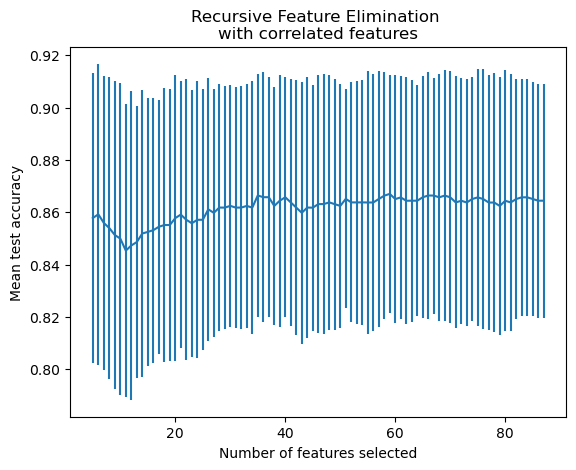

In [17]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [18]:
#Model4 （len(columns) descriptors）
Model4_clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)
Model4_clf.fit(X_XGB, y)
#Model4
Model4=Model_results(Model4_clf,X_XGB,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.855247,0.007724
Accuracy_train,0.927960,0.001518
F1 Score,0.533587,0.025631
Precision,0.780460,0.033103
Recall,0.443333,0.026920
Roc_auc,0.880697,0.010223


In [19]:
Model4_clf=Model4_clf.fit(X_XGB, y)
#Saving the final model
joblib.dump(Model4_clf, './Models/XGB.pkl')
XGB= joblib.load(filename='./Models/XGB.pkl')

In [20]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./Original data/X_test_data.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_xgb.columns.to_list()]
X_test=np.array(X_test_last)
X_test_last.head()

,GATS4s,ChiA_B(s),GATS2v,phLevel2,SM1_Dz(Z),GATS2m,MATS3e,P_VSA_charge_12,MATS1s,minaasC,...,MaxaasC,GATS8v,P_VSA_charge_6,SpMin2_Bh(m),CATS2D_08_AA,mindO,GATS3i,JGI5,GATS6v,SpMAD_X
cid,,,,,,,,,,,,,,,,,,,,,
5273,0.342920,0.411183,0.258906,0.000000,0.243487,0.442323,0.451792,0.122129,0.526320,0.768960,...,0.393133,0.582105,0.0,0.522215,0.000000,0.0,0.624981,0.350635,0.472454,0.670513
13463,0.417160,0.243434,0.258735,0.583333,0.491253,0.476635,0.871378,0.000000,0.172647,0.677781,...,0.235737,0.766627,0.0,0.400957,0.055556,0.0,0.607250,0.562308,0.464608,0.716550
39148,0.245117,0.315163,0.016047,0.666667,0.396009,0.417398,0.961849,0.000000,0.295151,0.690167,...,0.257118,0.692269,0.0,0.539577,0.055556,0.0,0.837932,0.519549,0.063983,0.601947
56328,0.334702,0.268416,0.240072,0.333333,0.383568,0.422322,0.660077,0.000000,0.491926,0.677850,...,0.235855,0.794233,0.0,0.499335,0.000000,0.0,0.465961,0.497261,0.463480,0.698243
67358,0.283538,0.170804,0.276847,0.666667,0.465169,0.387592,0.805116,0.057294,0.286401,0.579518,...,0.066114,0.804278,0.0,0.446843,0.111111,0.0,0.651795,0.596522,0.420126,0.645676


In [21]:
Predicted_data=pd.DataFrame(XGB.predict_proba(X_test),columns=['Probability of not Antimicrobial','Probability of Antimicrobial'])

Predicted_data

,Probability of not Antimicrobial,Probability of Antimicrobial
0,0.519421,0.480579
1,0.516725,0.483275
2,0.509258,0.490742
3,0.519278,0.480722
4,0.490203,0.509797
...,...,...
6864,0.510883,0.489117
6865,0.514895,0.485105
6866,0.498640,0.501360
6867,0.516980,0.483020


In [22]:
#Predicted results
Predicted_data=pd.DataFrame(XGB.predict_proba(X_test),columns=['Probability of not Antimicrobial','Probability of Antimicrobial'])
Predicted_data.index=X_test_last.index
Predicted_data.sort_values(by="Probability of Antimicrobial" , inplace=True, ascending=False)
Predicted_data.to_csv("./Results/XGB_predict_data.csv",sep=',')
Predicted_data.head()

,Probability of not Antimicrobial,Probability of Antimicrobial
cid,,
167350,0.484721,0.515279
71440751,0.484896,0.515104
21677555,0.485190,0.514810
121015029,0.485702,0.514298
6483433,0.485803,0.514197


In [23]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./Results/XGB_model_data.csv",sep=',')
Model_data.columns = [['XGBoost']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./Results/XGB_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method           XGBoost                                                    \
Model            Model 1             Model 2             Model 3             
Values              Mean        Se      Mean        Se      Mean        Se   
Accuracy_test   0.830903  0.008265  0.845333  0.008546  0.852000  0.007521   
Accuracy_train  0.994904  0.000564  0.994904  0.000564  0.928118  0.001454   
F1 Score        0.495906  0.027586  0.541577  0.025085  0.520812  0.024057   
Precision       0.617952  0.034746  0.708063  0.034038  0.783841  0.033415   
Recall          0.453333  0.029829  0.483333  0.027988  0.426667  0.025016   
Roc_auc         0.835450  0.011717  0.864103  0.012846  0.876608  0.010327   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.855247  0.007724  
Accuracy_train  0.927960  0.001518  
F1 Score        0.533587  0.025631  
Precision       0.780460  0.033103  
Recall          0.443333  0.026920  
Roc_auc         0.880697  0.010223